# ADS Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem Description

-- Input some description here --

## 1) Loading & Cleaning the Data

In [2]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list

In [3]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [4]:
# Merging all df from df list

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = df_list["BtcPrice"][1:].sort_index(ascending=False).Price.values

In [5]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [6]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,MarketCap,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,0.0,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,0.0,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,0.0,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,0.0,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,0.0,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


## 2) Exploratory Data Analysis

In [ ]:
df_data.info()

In [ ]:
df_data.describe()

In [ ]:
# Correlations
df_corr = df_data.corr()
df_corr

### Data Visualization

In [ ]:
# Visualizations - HeatMap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',cmap='coolwarm',annot=True)

In [ ]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

a = chunkIt(df_data.columns.values, 4)

In [ ]:
for column in a:
    sns.pairplot(data=df_data,
                      y_vars=['Price'],
                      x_vars= column)
    plt.show()

In [ ]:
# Visualizations - PairPlot
sns.pairplot(df_data)
plt.show()

In [ ]:
# Visualizations
x = df_data["Date"]

for element in columns[1:]:
    plt.show()
    y = df_data[element]
    fig = plt.figure(figsize = (15,5), dpi=100)
    axes = fig.add_axes([0.5,0.5,0.5,0.5])
    axes.plot(x,y)
    axes.set_title(element+" with date")

plt.show()

In [ ]:
# Time Series Analysis
df_time = df_data.set_index('Date').copy()

df_time['Year'] = df_time.index.year
df_time['Month'] = df_time.index.month
df_time['Weekday Name'] = df_time.index.weekday_name


df_time.head()

sns.set_style("dark")
sns.set(rc={'figure.figsize':(15, 7)})

for element in columns[1:]:
    plt.show()
    df_time[element].plot(linewidth=1,title = element+" over time (Day)");

In [ ]:
# columns
axes = df_time["2018"][columns[1:]].plot(alpha=0.5,  figsize=(20, 50), subplots=True)
for ax in axes:
    ax.set_ylabel('Over time (Day)')

In [ ]:
fig, axes = plt.subplots(19, 1, figsize=(20, 40), sharex=True)
for name, ax in zip(columns[1:], axes):
    sns.boxplot(data=df_time, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

### Seasonality Plot

In [ ]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Month', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [ ]:
#Weekly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Weekday Name', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [ ]:
#monthly
fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
sns.boxplot(data=df_time, x='Year', y="Price", ax=ax)
ax.set_ylabel('Price')
ax.set_title(name)

In [ ]:
df_time.info()

In [ ]:

years = ['2015','2016','2017','2018','2019']
test = {}
for year in years:
    test[year] = df_time[year][["Month","Price"]].rolling(90, center=True).mean()
    
fig, ax = plt.subplots()
for a in test:
    ax.plot(test[a]["Month"],test[a]["Price"], linewidth=2, label= a)
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');

In [ ]:
import matplotlib.dates as mdates

column='Price'
data_columns = ['Price','BtcPrice']
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
df_time_365d = df_time[data_columns].rolling(window=365, center=True, min_periods=360).mean()
df_time_7d = df_time[data_columns].rolling(7, center=True).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(df_time[column], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(df_time_7d[column], linewidth=2, label='7-d Rolling Mean')
ax.plot(df_time_365d[column], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price in $')
ax.set_title('Trends in Ethereum Price');
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [ ]:
ax.get_xticklabels()

In [ ]:
# Visualizations - BoxPlot
columns = df_data.columns
sns.set(style="whitegrid")

for element in columns[1:]:   
    plt.figure(figsize = (15,3))
    ax = sns.boxplot(x=df_data[element])

## 3) Feature Engineering
### Handling outliers


### Normalization

### Feature Selection

### Feature Importance plots

## 4) Model Fitting
### Grid search (Hyperparameter Tuning)

### Data Split train and test

In [ ]:
#ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
        
        

rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)



predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_data)
plt.plot(predictions_ARIMA)

===========================

In [7]:
# fbprophet

from fbprophet import Prophet


df_prophet1 = df_data.rename(columns={"Date": "ds"})
df_prophet = df_prophet1.rename(columns={"Price": "y"})

my_model = Prophet(interval_width=0.95)
my_model.fit(df_prophet)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
1531,2022-05-01
1532,2022-06-01
1533,2022-07-01
1534,2022-08-01
1535,2022-09-01


In [9]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1531,2022-05-01,430.066211,-3880.259895,5228.942072
1532,2022-06-01,469.269645,-3953.956734,5609.616479
1533,2022-07-01,475.936528,-4243.146469,5837.122152
1534,2022-08-01,447.303509,-4376.927339,6013.023404
1535,2022-09-01,438.566722,-4557.198524,6346.172811


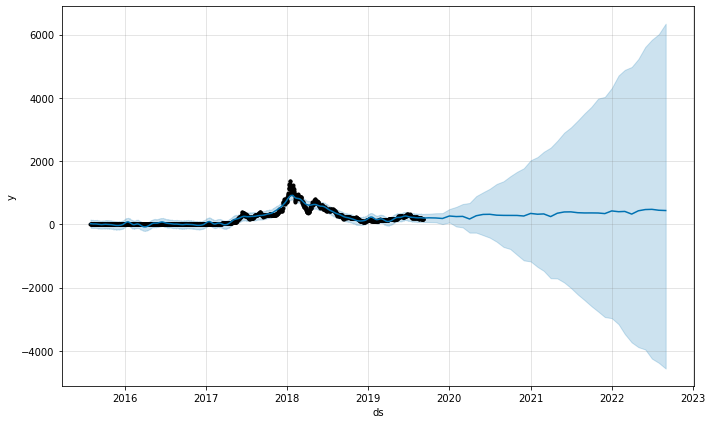

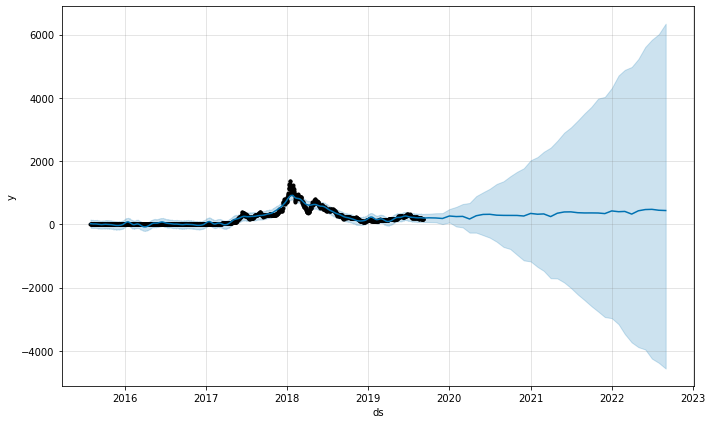

In [10]:
my_model.plot(forecast,uncertainty=True)

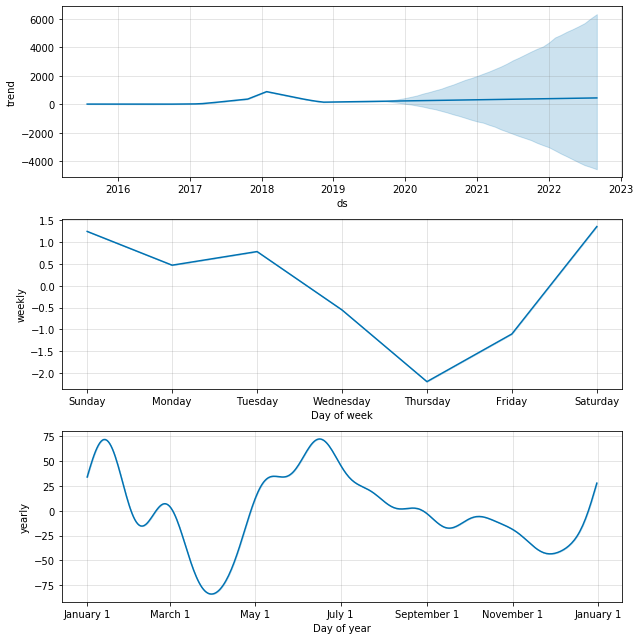

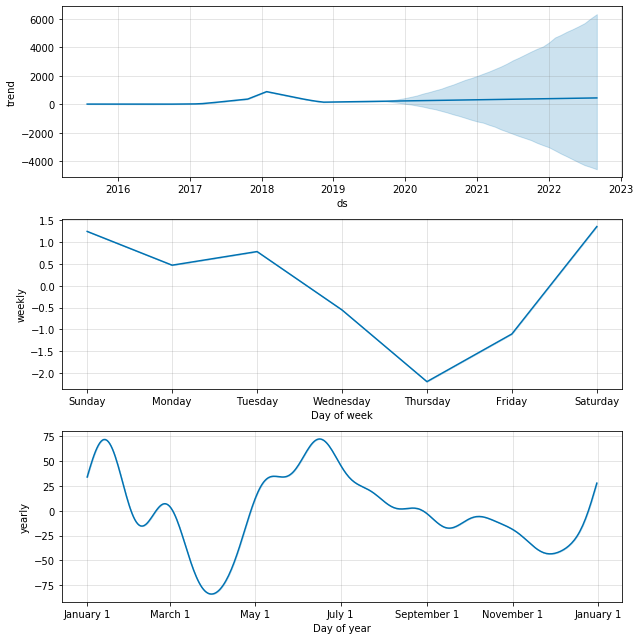

In [11]:
my_model.plot_components(forecast)

===========================

In [12]:
# cross validation
df_cross = df_data.set_index('Date').copy()

from sklearn import preprocessing
X=df_cross.drop('Price',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=df_cross['Price']

/Users/hanan.baset/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 99.9458 %


In [15]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])

The prediction is: 106.95489999999967 But the real value is: 106.9


In [16]:
#Apply our model and get our prediction
X_30=X[-30:]#We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [17]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=df_cross.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df_cross=df_cross.append(df1)
df_cross['Forecast'].tail()

/Users/hanan.baset/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


2019-10-02    179.60890
2019-10-03    179.71150
2019-10-04    175.72875
2019-10-05    174.66865
2019-10-06    178.42280
Name: Forecast, dtype: float64

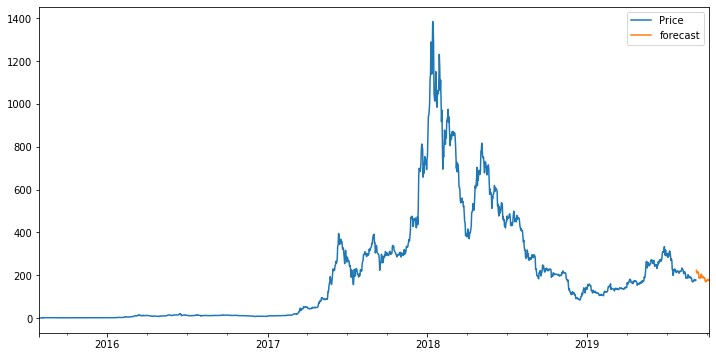

In [18]:
#Now we'll plot our forecast! 
pd.plotting.register_matplotlib_converters() #prophet: https://darektidwell.com/typeerror-float-argument-must-be-a-string-or-a-number-not-period-facebook-prophet-and-pandas/
df_cross['Price'].plot(figsize=(12,6),label='Price')
df_cross['Forecast'].plot(label='forecast')
plt.legend()

===========================

In [19]:
# LSTM
df_lstm = df_data.set_index('Date').copy()


# split data
split_date = '2018-06-25'
data_train = df_lstm.loc[df_lstm.index <= split_date].copy()
data_test = df_lstm.loc[df_lstm.index > split_date].copy()

In [20]:
# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 18))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 18, 1))

In [21]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(18,1)))
model.add(Dropout(0.2))
model.add(Dense(18))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Using TensorFlow backend.



Epoch 1/100
 - 1s - loss: 0.2026
Epoch 2/100
 - 0s - loss: 0.1006
Epoch 3/100
 - 1s - loss: 0.0890
Epoch 4/100
 - 0s - loss: 0.0851
Epoch 5/100
 - 0s - loss: 0.0820
Epoch 6/100
 - 0s - loss: 0.0790
Epoch 7/100
 - 1s - loss: 0.0761
Epoch 8/100
 - 1s - loss: 0.0754
Epoch 9/100
 - 1s - loss: 0.0704
Epoch 10/100
 - 1s - loss: 0.0692
Epoch 11/100
 - 1s - loss: 0.0666
Epoch 12/100
 - 0s - loss: 0.0648
Epoch 13/100
 - 1s - loss: 0.0631
Epoch 14/100
 - 1s - loss: 0.0594
Epoch 15/100
 - 1s - loss: 0.0566
Epoch 16/100
 - 1s - loss: 0.0521
Epoch 17/100
 - 0s - loss: 0.0438
Epoch 18/100
 - 0s - loss: 0.0339
Epoch 19/100
 - 0s - loss: 0.0277
Epoch 20/100
 - 0s - loss: 0.0259
Epoch 21/100
 - 0s - loss: 0.0244
Epoch 22/100
 - 0s - loss: 0.0235
Epoch 23/100
 - 0s - loss: 0.0225
Epoch 24/100
 - 1s - loss: 0.0216
Epoch 25/100
 - 1s - loss: 0.0220
Epoch 26/100
 - 1s - loss: 0.0208
Epoch 27/100
 - 0s - loss: 0.0205
Epoch 28/100
 - 1s - loss: 0.0193
Epoch 29/100
 - 1s - loss: 0.0193
Epoch 30/100
 - 1s - lo

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                2322      
Total params: 68,882
Trainable params: 68,882
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 18))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 18, 1))
predicted_ETH_price = mode l.predict(inputs)
predicted_ETH_price = sc.inverse_transform(predicted_ETH_price)

In [33]:
data_test['Weighted_Price_Prediction'] = predicted_ETH_price
data_all = pd.concat([data_test, data_train], sort=False)

ValueError: Wrong number of items passed 18, placement implies 1

In [32]:
#saving the predicted values in a common data frame for future comparision
final_data = data_all
final_data = final_data.reset_index()
final_data = final_data.rename(columns={'Price': 'lstm'})
final_data = final_data[['Date','Price','lstm']]
final_data.head()

KeyError: "['Price'] not in index"

In [26]:
_ = data_all[['Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

NameError: name 'data_all' is not defined

In [27]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=data_test['Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

KeyError: 'Weighted_Price_Prediction'

In [28]:
mean_absolute_error(y_true=data_test['Price'],
                   y_pred=data_test['Weighted_Price_Prediction'])

KeyError: 'Weighted_Price_Prediction'

In [ ]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat_arima = model_fit.predict(len(data), len(data), typ='levels')
print(yhat_arima)

forecast_arima = my_model.predict(future_dates)
forecast_arima['yhat'].tail()
my_model.plot(forecast_arima,uncertainty=True)

In [ ]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat_HWES = model_fit.predict(len(data), len(data))
print(yhat_HWES)


forecast_HWES = my_model.predict(future_dates)
forecast_HWES['yhat'].tail()
my_model.plot(forecast_HWES,uncertainty=True)

### Fit the model and predict

## 5) Evaluation
### Some evaluation methods

### Evaluation plots and data comparison

### Conclusion